In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def function(x):
#     return x**0.5*np.sin(x)
    return -(np.sin(x*7)+np.cos(14*x))*(x**2)*np.exp(-4*x)

def hermite(x,n):
    if n==0:
        return 1
    elif n==1:
        return x
    elif n==2:
        return (x**2-1)/(np.sqrt(2))
    elif n==3:
        return (x**3-3*x)/(np.sqrt(6))
    elif n==4:
        return (x**4-6*x**2+3)/(np.sqrt(24))
    elif n==5:
        return (x**5-10*x**3+15*x)/(np.sqrt(120))

def legendre(x,n):
    if n==0:
        return 1
    elif n==1:
        return x*(np.sqrt(3))
    elif n==2:
        return (3*x**2-1)*(np.sqrt(5))/2
    elif n==3:
        return (5*x**3-3*x)*(np.sqrt(7))/2
    elif n==4:
        return (35*x**4-30*x**2+3)*(np.sqrt(9))/8
    elif n==5:
        return (63*x**5-70*x**3+15*x)*(np.sqrt(11))/8  
    
def scalelegendre(x,new_min,new_max): 
    return ((new_min+new_max)+((new_max-new_min)*x))/2

def scalehermite(x,mean,sigma):
    return mean+sigma*x

def PCE(x,degree,poly,Y):
    n=len(x)
    M_=np.zeros((n,1))
    for i in range (0,n):
        M_[i] = Y[0]
        for j in range (1,degree+1):
            M_[i] = M_[i] + Y[j]*poly(x[i],j)
    return M_

def distance(x,xk):
    return x.reshape(-1,1)-xk.reshape(1,-1)

def euclid(r,l,scale):   #using kernell squared Euclidean distance
    return scale*np.exp(-((r**2)/(2*l**2)))

def GaussianPred(x,xn,yn,F,B):
    COV_nn=euclid(distance(xn,xn),l,sig)
    COV_xn=euclid(distance(x,xn),l,sig)
    COV_mult=np.matmul(COV_xn,np.linalg.inv(COV_nn))
    #-------------------------------------
    COV_xx=euclid(distance(x,x),l,sig)
    mean=np.matmul(COV_mult,(yn-np.matmul(F,B)))
    #-------------------------------------
    variance=np.subtract(COV_xx,np.matmul(COV_mult,COV_xn.transpose()))
    variaDiag=np.diagonal(variance)
    return [mean,variaDiag];

def VoronoiCell(x,xn):   #given x [single value] return the index of the closest xn [1D array]
    dist=abs(distance(x,xn))
    voro=np.argmin(np.squeeze(dist))
    return voro

# PCE_Legendre - uniform distribution

In [18]:
#range for sampling
xmin=0
xmax=1.75

poly = legendre    #ortogonal polynomials

n =5         #observations
degree = 2     #degree of expansion n=4 polynomials

# xleg=np.random.uniform(-1,1,n)    #random sampling UNIFORM Legendre
xleg=np.linspace(-1,1,n) 
xn=scalelegendre(xleg,xmin,xmax)
M=function(xn)

# Add a new observation

In [ ]:
# point=xnew

# newleg= 

# xn=np.append(xn,point)
# xleg=np.append(xhe,newhe)
# M=function(xn)
# n=len(xn)

array([0.00206427])

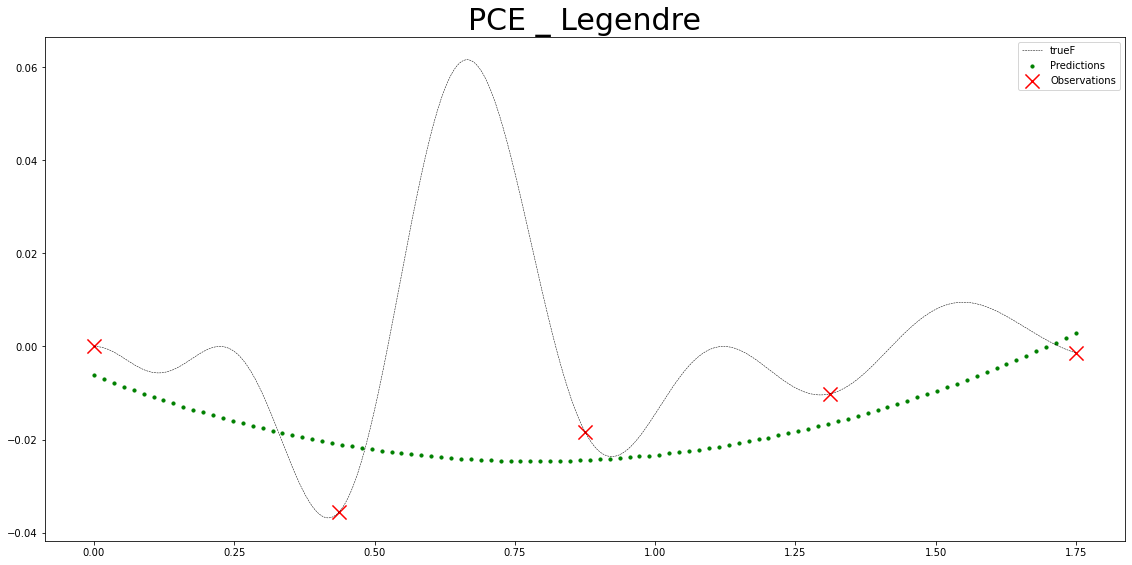

In [19]:
#Sampling matrix
A = np.zeros((n, degree+1))
for i in range (0,n):
    for j in range (0,degree+1):
        A[i,j] = np.array([poly(xleg[i],j)])
        
#Learning coefficients by Least-Square Minimization
Atrans=A.transpose()
Inv=np.linalg.inv(np.matmul(Atrans, A))
Inv_Trans=np.matmul(Inv,Atrans)
Y=np.matmul(Inv_Trans,M)     #coefficients for PC =f(M) observations

# mean=Y[0]
# cov=np.sum(Y**2)-mean**2

# #PC construction and evaluation
# def M_(x):
#     return Y[0]+Y[1]*poly(x,1)+Y[2]*poly(x,2)+Y[3]*poly(x,3)+Y[4]*poly(x,4)  #according to the degree of expansion


#Generation of testing samples and getting ground truth
points=1000         #resolution of the ground truth
tleg=np.linspace(-1, 1, points)
t=scalelegendre(tleg,xmin,xmax)
y=function(t)

#Predictions
predict=100
tleg2=np.linspace(-1, 1, predict)
t2=scalelegendre(tleg2,xmin,xmax)
PC=PCE(tleg2,degree,poly,Y)  #Predictions

#Error estimator - Leave-one-out cross validation (ELOO)

hiMat=np.matmul(A,Inv_Trans)

Sum=0
for i in range(0,n):
    Sumi=((M[i]-PC[i])/(1-hiMat[i,i]))**2
    Sum=Sum+Sumi
    
fig = plt.figure(figsize=(15,7))
ax=fig.add_axes([0,0,1,1])
ax.plot(t,y,label=r"trueF",linestyle='dashed',linewidth=0.5,color='k')
ax.scatter(t2,PC,label=r"Predictions",color='g',s=10)
plt.scatter(xn, M, label="Observations",marker="x",color='r', s=200)
plt.legend(prop={'size': 10})
plt.title(label="PCE _ Legendre",fontsize=30)

ELOO=Sum/n
ELOO

# PCE_Hermite - gaussian distribution

In [10]:
poly = hermite    #ortogonal polynomials
degree = 2     #degree of expansion n=4 polynomials

n = 5        #observations
xmean= 0.7      #mean 
xsigma= 0.3   #standard deviation

xhe=np.random.normal(0,1,n)    #random sampling UNIFORM Legendre
xn=scalehermite(xhe,xmean,xsigma)
M=function(xn)

# Add a new observation

In [ ]:
# point=xnew

# newhe=(point-xmean)/xsigma

# xn=np.append(xn,point)
# xhe=np.append(xhe,newhe)
# M=function(xn)
# n=len(xn)

Text(0.5, 1.0, 'PCE _ Hermite')

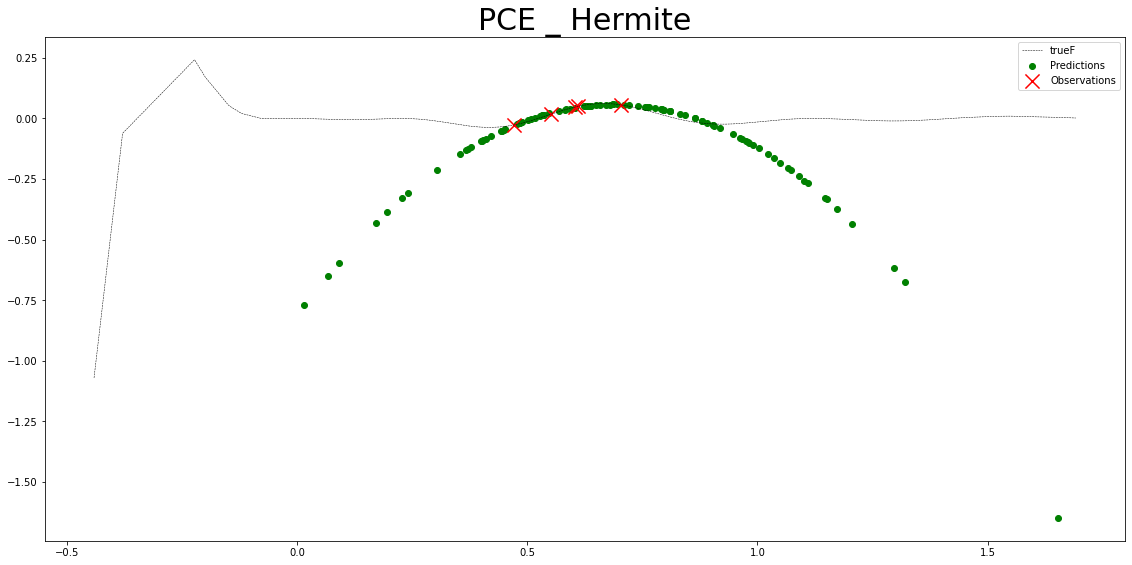

In [16]:
#Sampling matrix
A = np.zeros((n, degree+1))
for i in range (0,n):
    for j in range (0,degree+1):
        A[i,j] = np.array([poly(xhe[i],j)])
        
#Learning coefficients by Least-Square Minimization
Atrans=A.transpose()
Inv=np.linalg.inv(np.matmul(Atrans, A))
Inv_Trans=np.matmul(Inv,Atrans)
Y=np.matmul(Inv_Trans,M)     #coefficients for PC =f(M) observations

# mean=Y[0]
# cov=np.sum(Y**2)-mean**2

#Predictions
predict=100
therm2=np.random.normal(0,1,predict)
t2=scalehermite(therm2,xmean,xsigma)
PC=PCE(therm2,degree,poly,Y)  #Predictions

#Getting ground truth
points=1000
therm=np.random.normal(0,1,points)
t=scalehermite(np.sort(therm),xmean,xsigma)
y = function(t)

#Error estimator - Leave-one-out cross validation (ELOO)

hiMat=np.matmul(A,Inv_Trans)

# Sum=0
# for i in range(0,n):
#     Sumi=((M[i]-PC[i])/(1-hiMat[i,i]))**2
#     Sum=Sum+Sumi
    
fig = plt.figure(figsize=(15,7))
ax=fig.add_axes([0,0,1,1])
ax.plot(t,y,label=r"trueF",linestyle='dashed',linewidth=0.5,color='k')#,size=10)
ax.scatter(t2,PC,label=r"Predictions",color='g')
plt.scatter(xn, M, label="Observations",marker="x",color='r',s=200)
plt.legend(prop={'size': 10})
# plt.xlim([0, 2.5])
# plt.ylim([0.1, -0.1])
plt.title(label="PCE _ Hermite",fontsize=30)

# ELOO=Sum/n
# ELOO

# Kriging Model

In [4]:
kernel = 1 * RBF(length_scale=1.5, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(xn.reshape(-1,1), M.reshape(-1,1))
gaussian_process.kernel_

0.0177**2 * RBF(length_scale=0.317)

In [5]:
# kernel hyperparameters------------------------
l=0.09      #0.184
sig=0.04**2  #0.1**2
# KRIGING Predictions---------------------------
# meanpred=np.zeros([n])
# KRIGING mean-----------------------------------
COV_nn=euclid(distance(xn,xn),l,sig)           # R  correlation between observed points
COV_xn=euclid(distance(t2,xn),l,sig)           # r'(x)  correlation, new points with observations
COV_mult=np.matmul(COV_xn,np.linalg.inv(COV_nn))   #  r'(x) * R^-1
FB=np.matmul(A,Y)
KrigMean=np.matmul(COV_mult,(M-FB)).reshape(-1,1)
meanpred=PC+KrigMean
# KRIGING variance-------------------------------
COV_xx=euclid(distance(t2,t2),l,sig)
variance=np.subtract(COV_xx,np.matmul(COV_mult,COV_xn.transpose())) #
variaDiag=np.diagonal(variance).reshape(-1,1)

In [222]:
# [KrigMean,variaDiag]=GaussianPred(t2,xn,M,A,Y)
# meanpred=PC+KrigMean.reshape(-1,1)

Text(0.5, 1.0, 'PCE _ Kriging')

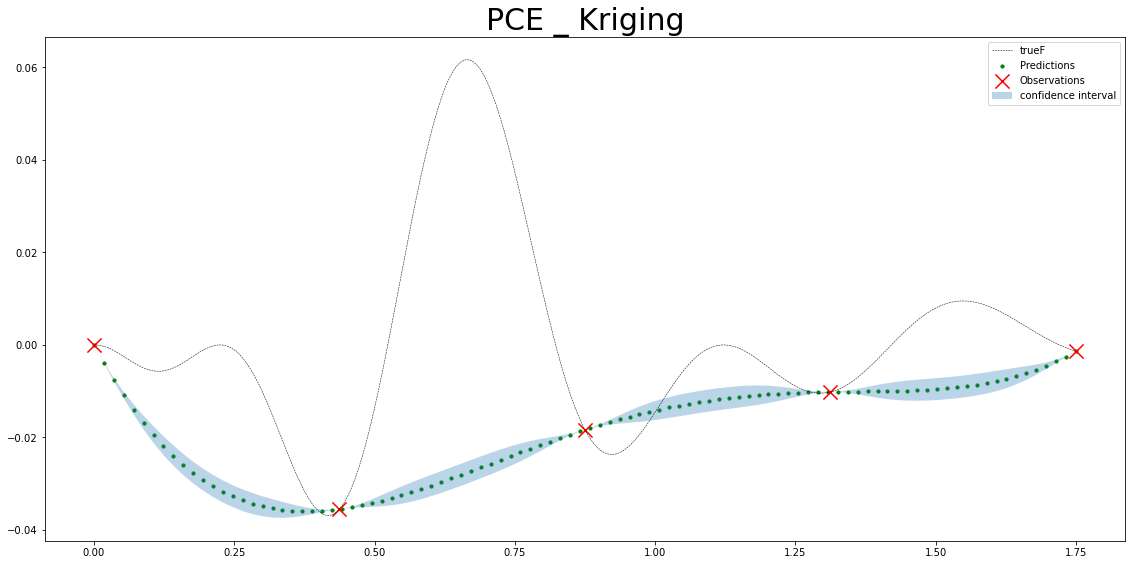

In [6]:
ymin=(meanpred - 1.5*variaDiag).reshape(-1,1)
ymax=(meanpred + 1.5*variaDiag).reshape(-1,1)

#sorting in case of random samples for ploting
ind=np.argsort(np.squeeze(t2))
a,b,c=np.asarray(t2)[ind], np.asarray(ymin)[ind], np.asarray(ymax)[ind]

fig = plt.figure(figsize=(15,7))
ax=fig.add_axes([0,0,1,1])
ax.plot(t,y,label=r"trueF",linestyle='dashed',linewidth=0.5,color='k')
ax.scatter(t2,meanpred,label=r"Predictions",color='g',marker="o",s=10)
plt.scatter(xn, M, label="Observations",marker="x",color='r',s=200)
plt.fill_between(
#     t2.ravel(),
#     ymin.ravel(),
#     ymax.ravel(),
    a.ravel(),
    b.ravel(),
    c.ravel(),
    alpha=0.3,
    label=r"confidence interval",
)
plt.legend(prop={'size': 10})
# plt.xlim([0, 2.5])
# plt.ylim([-0.1, 0.1])
plt.title(label="PCE _ Kriging",fontsize=30)

# LeaveOneOut_CrossValidation

In [7]:
xhe=xleg
PC_loo=np.zeros(n)
KrigMeanloo=np.zeros(n)
KrigVarloo=np.zeros(n)
PC_looALL=np.zeros((n,predict))
KrigMeanlooALL=np.zeros((n,predict))
KrigVarlooALL=np.zeros((n,predict))

for i in range (0,n):
    M_loo=np.delete(M,[i])          #y_n-i     leaving element i out the observations (M)
    xhe_loo=np.delete(xhe,[i])      #xhe_n-i   leaving element i out the hermite inputs (xi)
    xn_loo=np.delete(xn,[i])        #x_n-i     leaving element i out the inputs (xi)

    #Sampling matrix (F matrix) evaluation of the samples in a sparse p polynomials matrix from PCE
    F_loo = np.zeros((n-1, degree+1))
    B_loo = np.zeros((degree+1,1))
    n_loo = len (F_loo)
    
    for j in range (0,n_loo):
        for k in range (0,degree+1):
            F_loo[j,k] = np.array([poly(xhe_loo[j],k)])
            
    #Learning coefficients by Least-Square Minimization
    Ftrans=F_loo.transpose()
    Inv=np.linalg.inv(np.matmul(Ftrans, F_loo))
    Inv_Trans=np.matmul(Inv,Ftrans)
    B_loo=np.matmul(Inv_Trans,M_loo)                #B coefficients for PC =f(M_loo) observations
    
    # PCE mean prediction --------------leaving i-term out
    PC_loo[i]=PCE([xhe[i]],degree,poly,B_loo)   #following coefficients B
    PC_looALL[i]=np.squeeze(PCE(tleg2,degree,poly,B_loo))
    
    # KRIGING mean--------------leaving i-term out
    [KrigMeanloo[i],KrigVarloo[i]]=GaussianPred(xn[i],xn_loo,M_loo,F_loo,B_loo)    #following coefficients B
    [KrigMeanlooALL[i],KrigVarlooALL[i]]=GaussianPred(t2,xn_loo,M_loo,F_loo,B_loo)
    
mean_loo=PC_loo+KrigMeanloo
e_loo=(M-mean_loo)**2
sumat=np.divide(e_loo,KrigVarloo)
mean_looALL=PC_looALL+KrigMeanlooALL

LOOCV=np.zeros(predict)
cell=np.zeros(predict)
for k in range (0,predict):  
    voro = VoronoiCell(t2[k],xn)
    LOOCV[k]= variaDiag[k]*(1+sumat[voro])
#     cell[k] = voro

Text(0, 0.5, 'Quantity of Interest (QoI)')

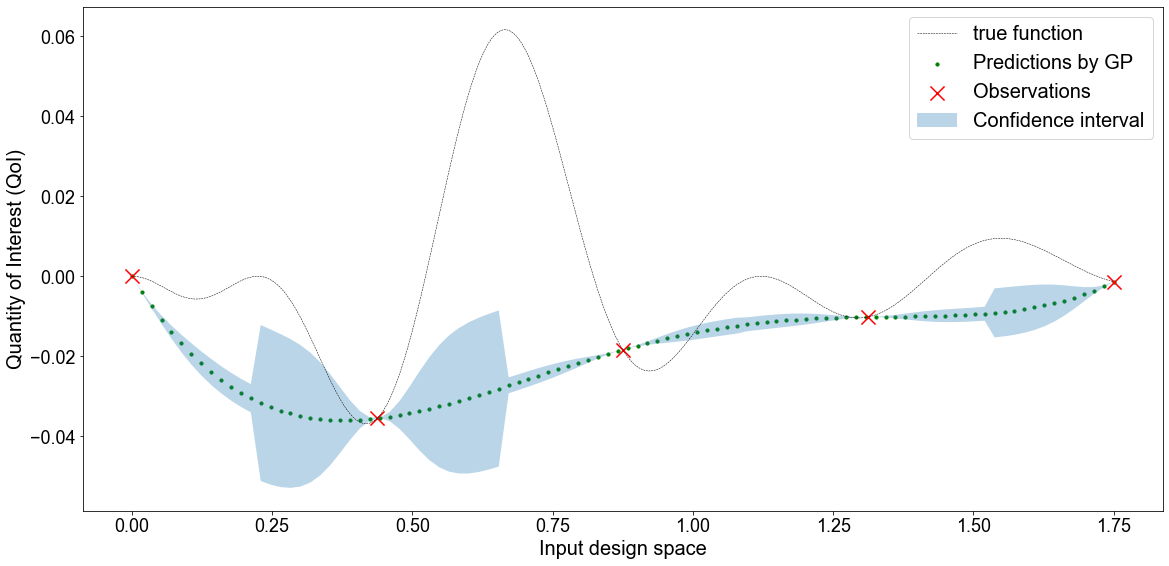

In [23]:
yminloo=(meanpred - 1.0*LOOCV.reshape(-1,1))
ymaxloo=(meanpred + 1.0*LOOCV.reshape(-1,1))
# hfont = {'fontname':'Arial'}
plt.rcParams.update({'font.family':'Arial'})

size=20

nloo=1   #to check the shape of the n-loo predictors
#sorting in case of random samples for ploting variance (fill between)
# indp=np.argsort(np.squeeze(t2))
ap,bp,cp=np.asarray(t2)[ind], np.asarray(yminloo)[ind], np.asarray(ymaxloo)[ind]

Varimax= np.argmax(cp-bp)
xnew=ap[Varimax]
ynew=function(xnew)

fig = plt.figure(figsize=(15,7))
ax=fig.add_axes([0,0,1,1])
ax.plot(t,y,label=r"true function",linestyle='dashed',linewidth=0.5,color='k')
ax.scatter(t2,meanpred,label=r"Predictions by GP",color='g',s=10)
# ax.scatter(xn,mean_loo,label=r"Prediction LOOCV",color='y',s=200,marker="+")
plt.scatter(xn, M, label="Observations",marker="x",color='r',s=200)

# ax.scatter(t2,mean_looALL[nloo],label=r"Prediction LOO-ALL",color='y',s=20,marker="+")
# ax.scatter(t2,KrigMeanlooALL[nloo],label=r"Prediction KrigALL",color='#17becf',s=20,marker="*")
# ax.scatter(t2,PC_looALL[nloo],label=r"Prediction PCEALL",color='#1f77b4',s=20,marker="x")

# plt.scatter(xnew,ynew,label="NewPoint",marker="o",color='r',s=200)

plt.fill_between(
    ap.ravel(),
    bp.ravel(),
    cp.ravel(),
    alpha=0.3,
    label=r"Confidence interval",
)
plt.legend(prop={'size': size})
plt.tick_params(axis='x', labelsize=size*0.9)
plt.tick_params(axis='y', labelsize=size*0.9)
plt.xlabel('Input design space', fontsize=size)
plt.ylabel('Quantity of Interest (QoI)', fontsize=size)
# plt.xlim([0, 2.5])
# plt.ylim([-3, 5])
# plt.title(label="PCE _ Kriging _LOO CV",fontsize=30)